# Divide face into parts

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from faceparsing.parser import FaceParser
from imagine.shape.segment import ParsingSegmenter
from imagine.color.utils import Recolor, generate_distinct_colors
from imagine.color.conversion import BgrToRgb
from automakeup.face import extract as face_extraction, bounding
from mtcnn import MTCNN

In [2]:
parser = FaceParser()

In [3]:
parts_map = {
    "skin": 1,
    "l_eye": 2,
    "r_eye": 2,
    "hair": 3,
    "u_lip": 4,
    "l_lip": 4
}
segmenter = ParsingSegmenter(parser, parts_map=parts_map)

In [4]:
mtcnn = MTCNN()

In [5]:
extractor = face_extraction.SimpleFaceExtractor(512, interpolation=cv2.INTER_CUBIC)
bb_finder = bounding.MTCNNBoundingBoxFinder(mtcnn)

In [6]:
cmap = {code: color for code, color in zip(parts_map.values(), generate_distinct_colors(len(parts_map.values())))}

In [7]:
def show(image):
    bb = bb_finder.find(image)
    image = extractor.extract(image, bb)
    segmented = segmenter(image)
    recolored = np.copy(image)
    for c in cmap:
        recolored = Recolor(cmap[c], 0.25)(recolored, mask = segmented == c)
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    axs[0].imshow(image)
    axs[0].set_axis_off()
    axs[1].imshow(recolored)
    axs[1].set_axis_off()
    plt.tight_layout()
    plt.show()

In [8]:
image_paths = ["faces/" + f for f in os.listdir("faces")]

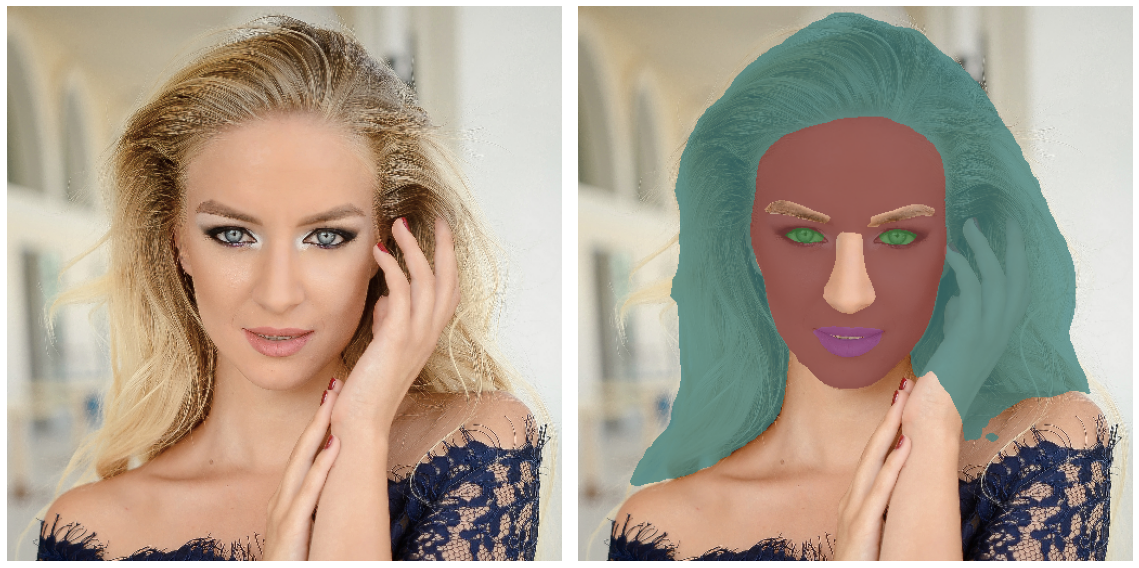

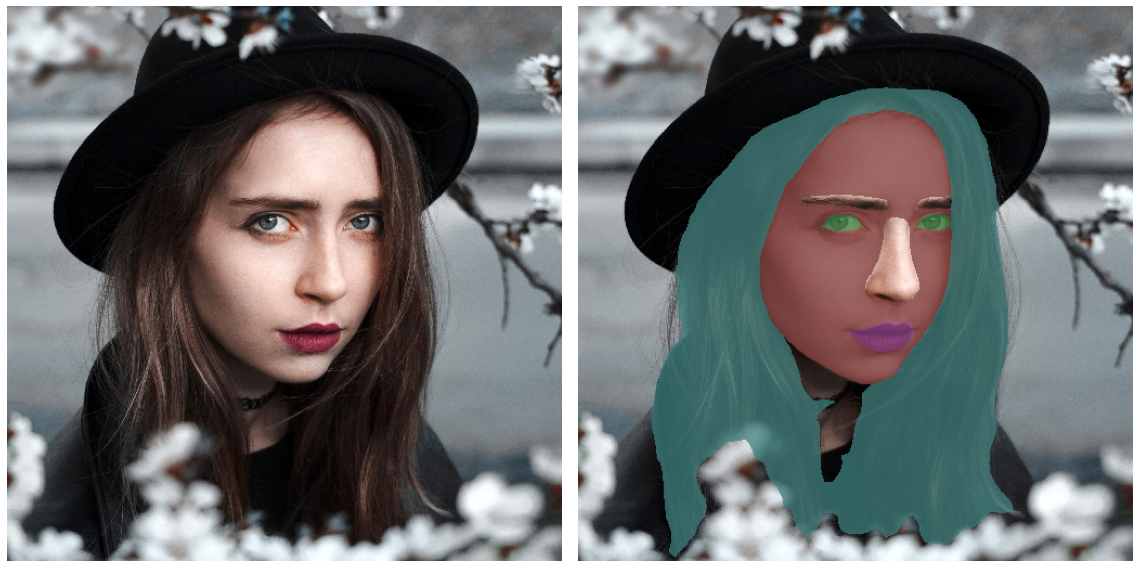

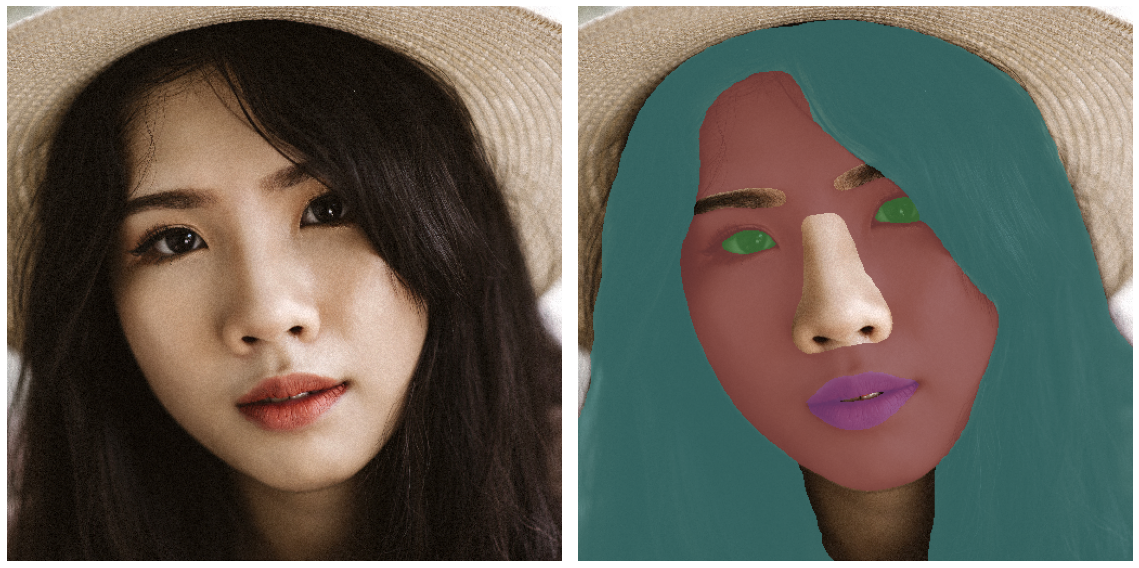

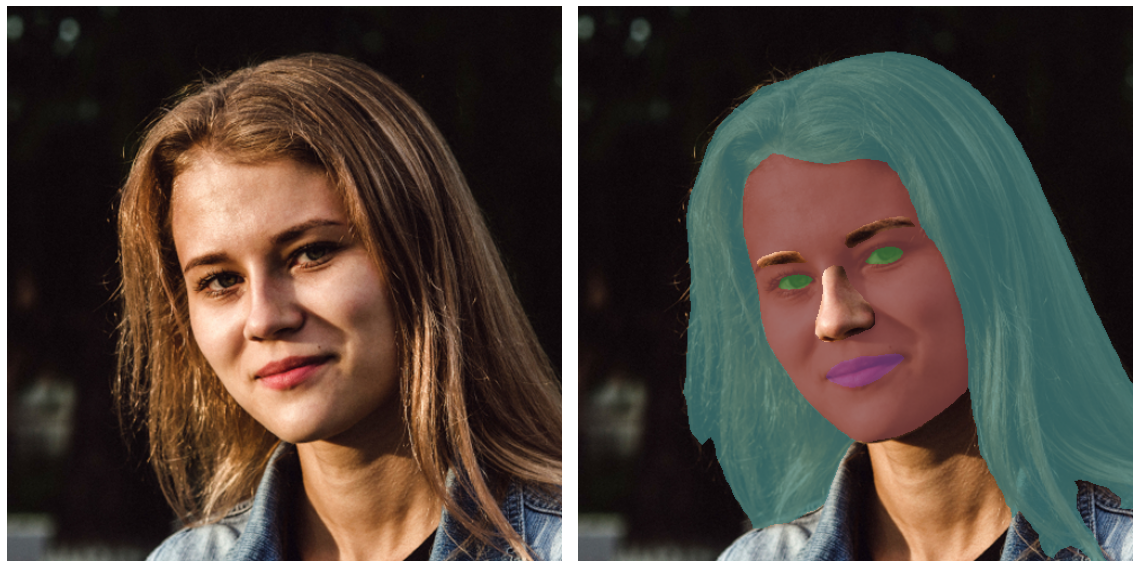

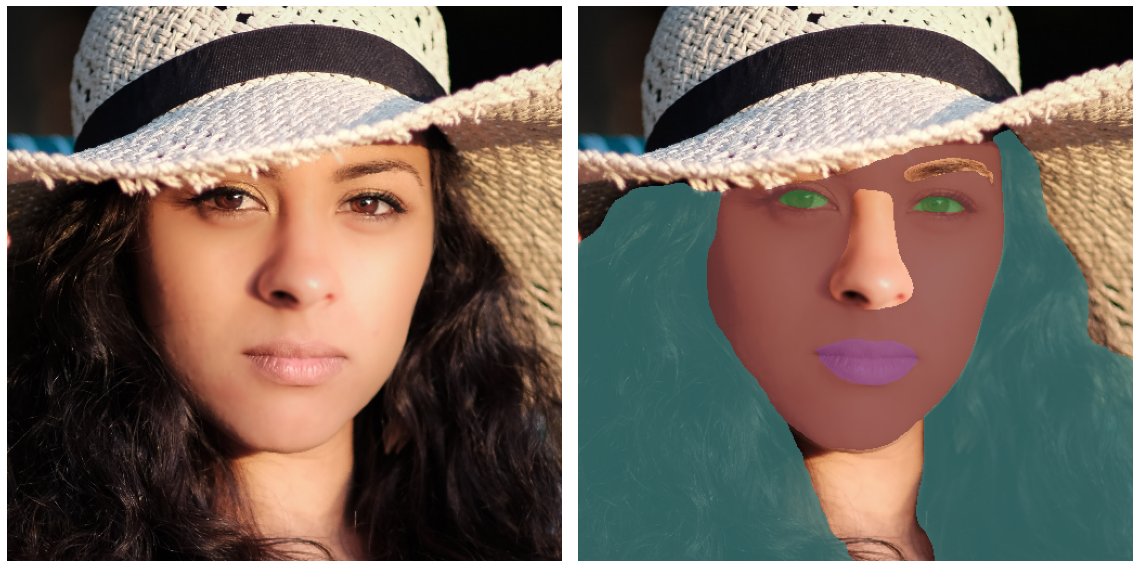

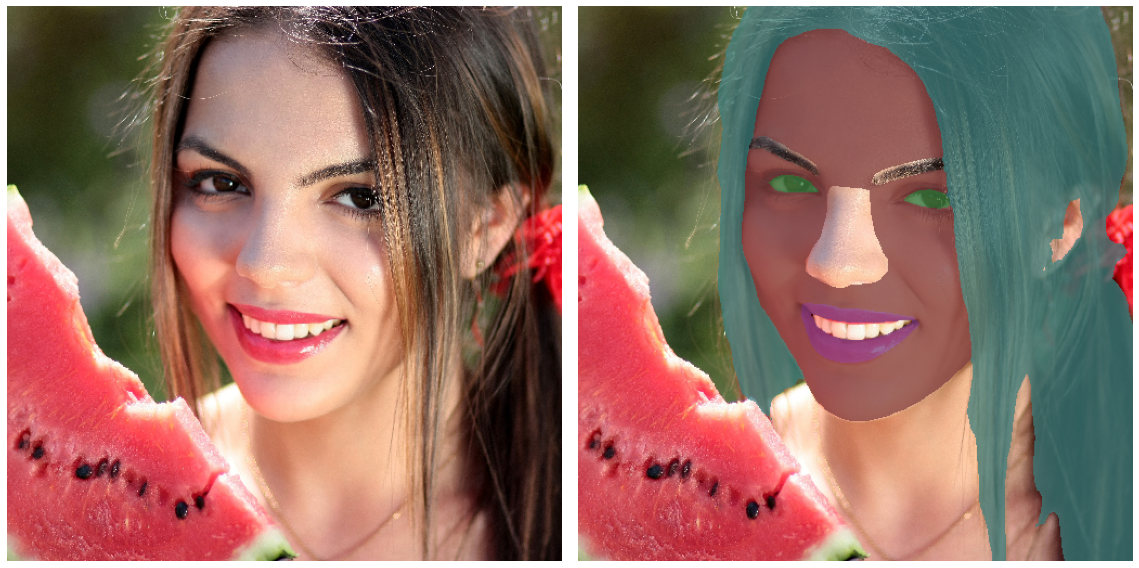

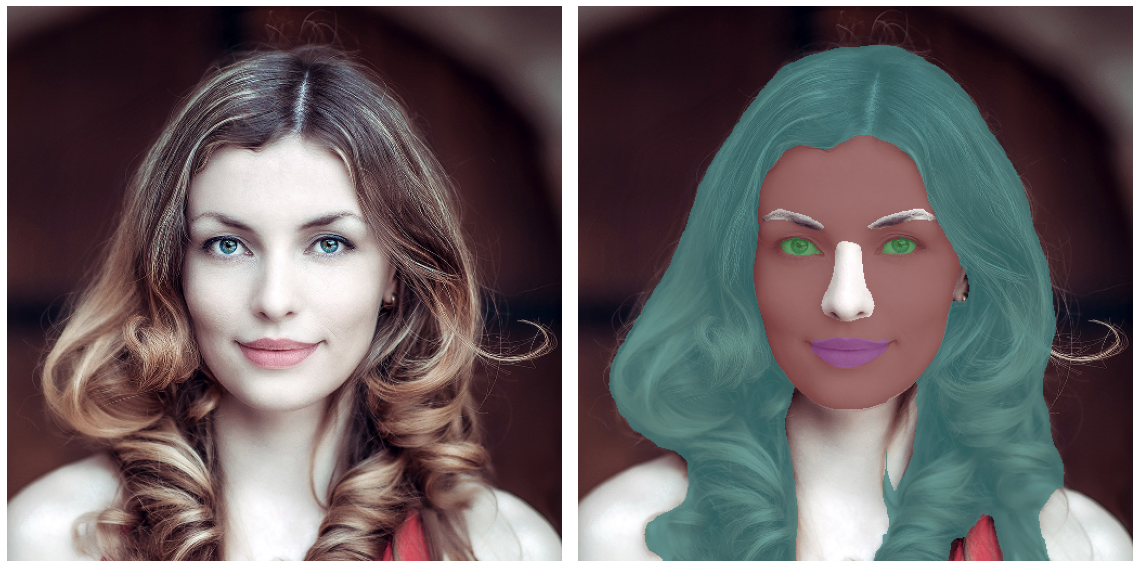

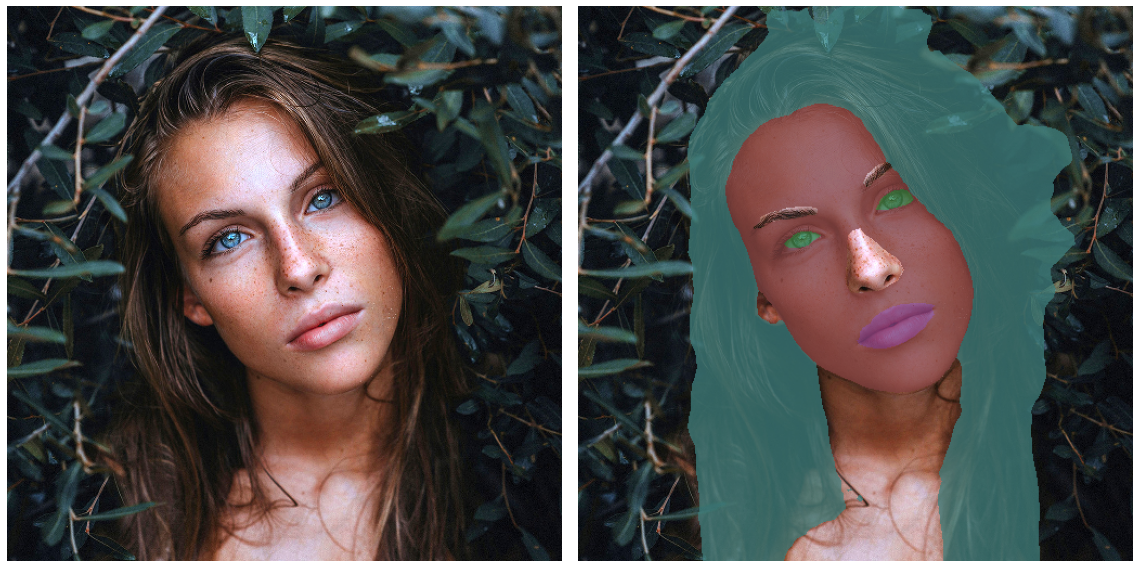

In [9]:
for path in image_paths:
    image = BgrToRgb(cv2.imread(path))
    show(image)